## Model Training and Evaluation

After preprocessing the data and saving it to a CSV file, the next step is to build and evaluate various machine learning models. This section outlines the approach for model training, evaluation, and feature importance analysis, ensuring we achieve the best model for predicting insurance claims.

### Objectives
The main objectives of this report are to:
- Document the complete process of training, evaluating, and interpreting machine learning models for predicting car insurance claims.
- Utilize the preprocessed dataset to train various models.
- Evaluate each model based on relevant metrics to identify the best-performing one.
- Conduct SHAP (SHapley Additive exPlanations) analysis to explain feature importance and model predictions.

### Model Training Approach
1. **Data Preparation**: Load the preprocessed dataset and split it into training and testing sets.
2. **Model Selection**: Choose various machine learning algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting).
3. **Training**: Fit the models on the training set.
4. **Evaluation**: Assess model performance using metrics such as MAE, RMSE, R², and accuracy.
5. **Feature Importance**: Use SHAP analysis to interpret model outputs and understand the impact of different features on predictions.

### Conclusion
This comprehensive approach ensures that we not only find the most effective model for predicting insurance claims but also understand the underlying factors that influence these predictions.

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb  # Ensure XGBoost is installed for advanced gradient boosting
import os
import sys

In [18]:
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [19]:
# Set options for pandas to display more columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [20]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore", message="")

In [21]:
# Load the preprocessed data from CSV file
df = pd.read_csv('../data/preprocessed_data.csv')
print("Data loaded successfully.")

Data loaded successfully.


In [22]:
# Define features and target variable for model training
X = df.drop(columns=['TotalPremium'])
y = df['TotalPremium']

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [24]:
# Define a function for Linear Regression model training and evaluation
def linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()  # Initialize the Linear Regression model
    model.fit(X_train, y_train)  # Fit the model to the training data
    predictions = model.predict(X_test)  # Make predictions on the test set
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    return model, mse  # Return the trained model and the error

In [25]:
# Define a function for Decision Tree model training and evaluation
def decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor(random_state=42)  # Initialize the Decision Tree model
    model.fit(X_train, y_train)  # Fit the model to the training data
    predictions = model.predict(X_test)  # Make predictions on the test set
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    return model, mse  # Return the trained model and the error

In [26]:
# Define a function for Random Forest model training and evaluation
def random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize the Random Forest model
    model.fit(X_train, y_train)  # Fit the model to the training data
    predictions = model.predict(X_test)  # Make predictions on the test set
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    return model, mse  # Return the trained model and the error

In [27]:
# Define a function for XGBoost model training and evaluation
def xgboost_model(X_train, y_train, X_test, y_test):
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # Initialize the XGBoost model
    model.fit(X_train, y_train)  # Fit the model to the training data
    predictions = model.predict(X_test)  # Make predictions on the test set
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    return model, mse  # Return the trained model and the error

In [28]:
# Define a function to evaluate models using MSE and R² metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)  # Make predictions on the test set
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    r2 = r2_score(y_test, predictions)  # Calculate R² score
    return {"mse": mse, "r2": r2}  # Return the evaluation metrics

In [29]:
# Define a function to explain model predictions using SHAP
def explain_model_shap(model, X_train):
    explainer = shap.Explainer(model, X_train)  # Initialize SHAP explainer with the model
    shap_values = explainer(X_train)  # Calculate SHAP values for the training data
    shap.summary_plot(shap_values, X_train)  # Create a summary plot of SHAP values

In [30]:
# Initialize and train models, then evaluate their performance
lr_model, mse_lr = linear_regression(X_train, y_train, X_test, y_test)
dt_model, mse_dt = decision_tree(X_train, y_train, X_test, y_test)
rf_model, mse_rf = random_forest(X_train, y_train, X_test, y_test)
xgb_model, mse_xgb = xgboost_model(X_train, y_train, X_test, y_test)

In [31]:
# Print evaluation metrics for all models
print(f"Linear Regression MSE: {mse_lr}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Random Forest MSE: {mse_rf}")
print(f"XGBoost MSE: {mse_xgb}")

Linear Regression MSE: 280.714737029096
Decision Tree MSE: 251.76395259291226
Random Forest MSE: 251.73248513710507
XGBoost MSE: 262.5010440580053


In [32]:
# Create a summary DataFrame for the evaluation metrics
metrics = {
    'Linear Regression': mse_lr,
    'Decision Tree': mse_dt,
    'Random Forest': mse_rf,
    'XGBoost': mse_xgb
}

In [34]:
# Display evaluation metrics in a DataFrame
print("Evaluation metrics:")
pd.DataFrame(metrics, index=['MSE']).T

Evaluation metrics:


,MSE
Linear Regression,280.714737
Decision Tree,251.763953
Random Forest,251.732485
XGBoost,262.501044


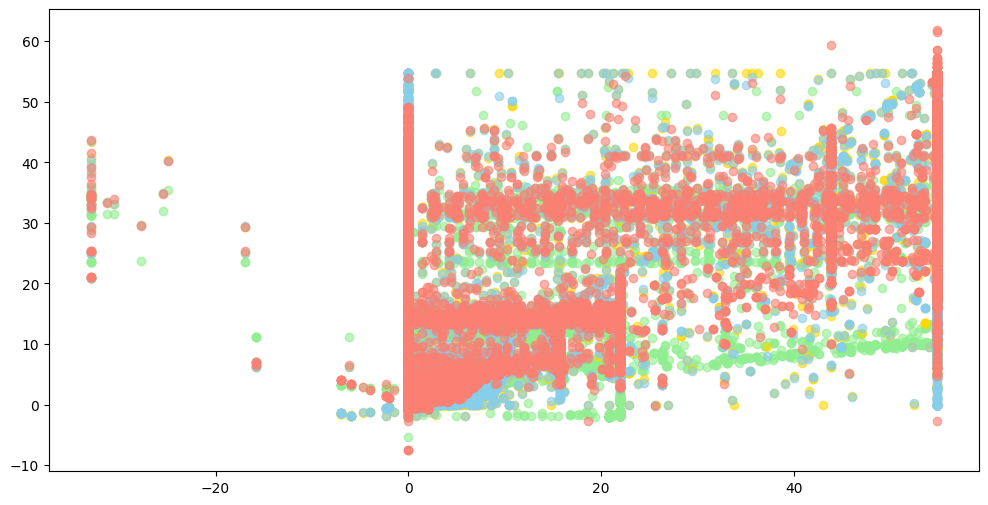

In [35]:
# Plot predictions vs actual values for comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_model.predict(X_test), label='Linear Regression', alpha=0.6, color='lightgreen')
plt.scatter(y_test, dt_model.predict(X_test), label='Decision Tree', alpha=0.6, color='gold')
plt.scatter(y_test, rf_model.predict(X_test), label='Random Forest', alpha=0.6, color='skyblue')
plt.scatter(y_test, xgb_model.predict(X_test), label='XGBoost', alpha=0.6, color='salmon')

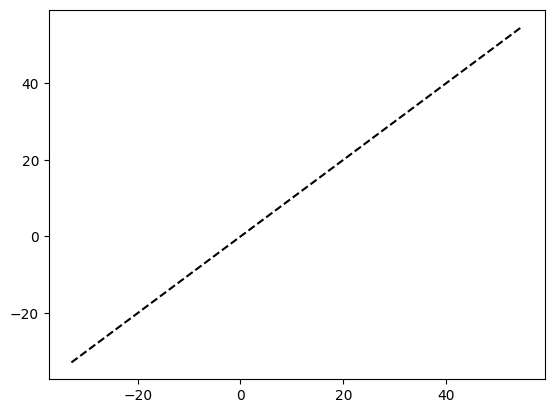

In [36]:
# Add diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1.5)